In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


In [4]:
df = pd.read_csv("train.csv")

print(df.head())

print(df.shape)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [5]:
print(df.columns)
print(df.dtypes)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df['Sex'].value_counts()
df['Embarked'].value_counts()


,count
Embarked,
S,644
C,168
Q,77


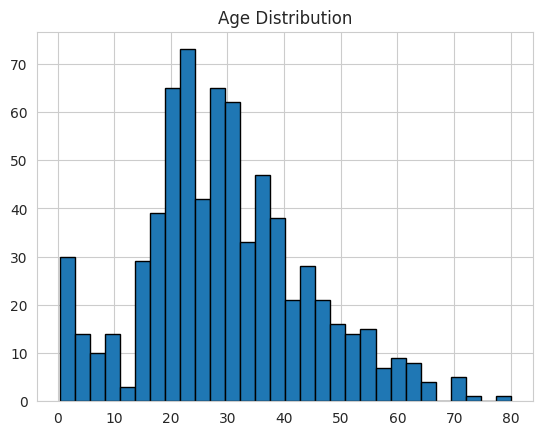

In [17]:
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.show()



The majority of passengers are between 20–40 years old, with a peak in the mid-20s. There are fewer very young children and elderly passengers.

<Axes: xlabel='Fare'>

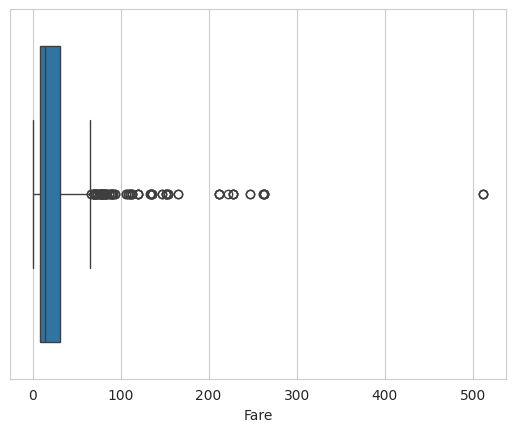

In [18]:
sns.boxplot(x=df['Fare'])

Most fares are clustered below 100, but a few high outliers (above $500) are visible, indicating a small number of wealthy passengers.

<Axes: xlabel='Sex', ylabel='count'>

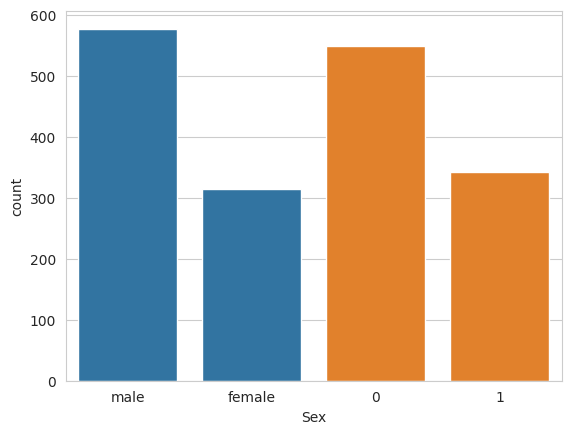

In [10]:
sns.countplot(x='Sex', data=df)
sns.countplot(x='Survived', data=df)


<Axes: xlabel='Survived', ylabel='count'>

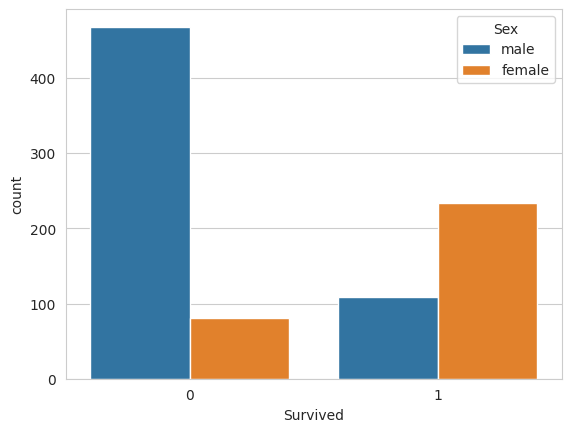

In [11]:
sns.countplot(x='Survived', hue='Sex', data=df)


Around 38% of passengers survived. The majority (62%) did not survive the disaster.

<Axes: xlabel='Survived', ylabel='count'>

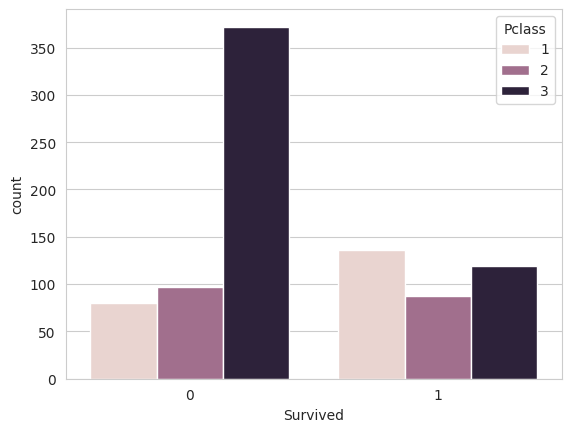

In [12]:
sns.countplot(x='Survived', hue='Pclass', data=df)


Females had a much higher survival rate compared to males — most female passengers survived, while most male passengers did not.

<Axes: xlabel='Age', ylabel='Fare'>

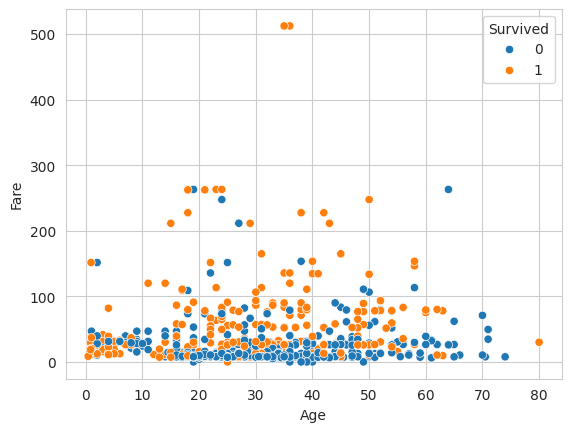

In [13]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)


Survivors are spread across all ages but tend to cluster among higher fare values, suggesting higher-class tickets had better survival chances.

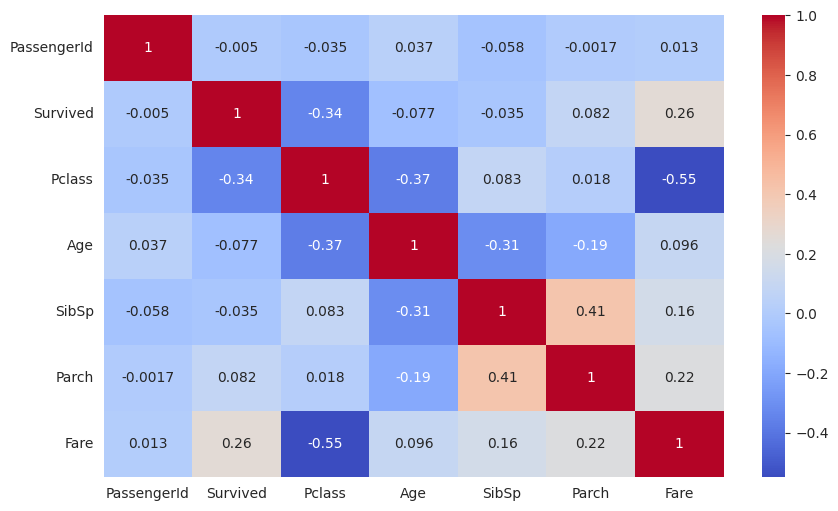

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()



Survival is negatively correlated with Passenger Class (Pclass) and positively correlated with Fare. Age shows a weak correlation with survival.

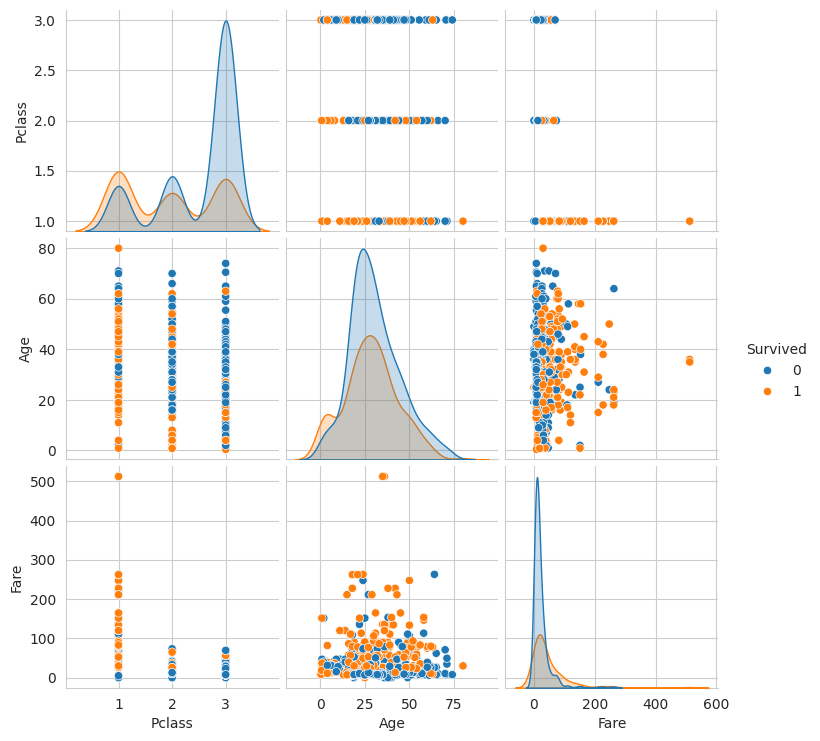

In [16]:
sns.pairplot(df[['Survived','Pclass','Age','Fare']], hue='Survived')


Clear separation is seen for Fare and Pclass between survivors and non-survivors. Age differences between survivors and non-survivors are less distinct.

Summary of Findings
Gender: Females had a significantly higher survival rate than males.

Class: 1st class passengers had a much better chance of survival compared to 3rd class passengers.

Fare: Higher fares correlated with higher survival rates, likely due to better cabin locations and priority evacuation.

Age: Survival did not strongly depend on age, but young children had slightly higher chances.

Overall Insight: Social status, ticket price, and gender were key factors influencing survival on the Titanic.